In [1]:
# import from scripts
from helpers import *
from sampler import *

Using box scale: (512, 512)


In [2]:
# for demo, use pre-fab layout
from prompt import get_prompts
from utils import cache

cache.cache_path = 'cache/cache_demo_v0.1_gpt-4.json'
print(f"Loading LLM responses from {cache.cache_path}")

cache.init_cache(allow_nonexist=False)
prompts = get_prompts('demo', model='gpt-4')

prompt = prompts[0].strip().rstrip(".")

# Load response from cache
cache.reset_cache_access()
layout = cache.get_cache(prompt)

report = '\n\t'.join(layout.split('\n'))
print(f"  Prompt: {prompt}\n  {report}")

Loading LLM responses from cache/cache_demo_v0.1_gpt-4.json
Cache path: cache/cache_demo_v0.1_gpt-4.json
  Prompt: In an indoor scene, a blue cube directly above a red cube with a vase on the left of them
  [('a blue cube', [202, 120, 110, 110]), ('a red cube', [202, 230, 110, 110]), ('a vase', [62, 190, 80, 150])]
	Background prompt: An indoor scene
	Negative prompt: 


### Generate Functions

There are 2 of these (*generate* and *generate_plus*):
- *generate* assumes almost all defaults from the original repo
- *generate_plus* allows for a little more kwarg manipulation

In [3]:
# check globals to avoid loading twice:
if not globals().get('generator', None):
    generator = load_generator(run_model='lmd_plus')

Using SD: gligen/diffusers-generation-text-box


In [4]:
# to save the images, instead of returning them,
# pass the argument output_dir={your_target_dst}
output = generate_plus(prompt, 3, layout, generator=generator)

Now generating 3 samples with layout:
 {'prompt': 'In an indoor scene, a blue cube directly above a red cube with a vase on the left of them', 'gen_boxes': [('a blue cube', (202, 120, 110, 110)), ('a red cube', (202, 230, 110, 110)), ('a vase', (62, 190, 80, 150))], 'bg_prompt': 'An indoor scene', 'extra_neg_prompt': ''}
Running generation.lmd_plus.run as the generator...
--------------------------------------------------------------------------------

Fetching masked latents for: An indoor scene with a blue cube


Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Fetching masked latents for: An indoor scene with a red cube


Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Fetching masked latents for: An indoor scene with a vase


Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Generation with spatial guidance from input latents and first 25 steps frozen
 (Direct generation from the composed latents input)
Generation from composed latents (with semantic guidance)
--------------------------------------------------------------------------------

Fetching masked latents for: An indoor scene with a blue cube


Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Fetching masked latents for: An indoor scene with a red cube


Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Fetching masked latents for: An indoor scene with a vase


Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Generation with spatial guidance from input latents and first 25 steps frozen
 (Direct generation from the composed latents input)
Generation from composed latents (with semantic guidance)
--------------------------------------------------------------------------------

Fetching masked latents for: An indoor scene with a blue cube


Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Fetching masked latents for: An indoor scene with a red cube


Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Fetching masked latents for: An indoor scene with a vase


Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Gligen Pipeline (Timesteps):   0%|          | 0/50 [00:00<?, ?it/s]

Generation with spatial guidance from input latents and first 25 steps frozen
 (Direct generation from the composed latents input)
Generation from composed latents (with semantic guidance)


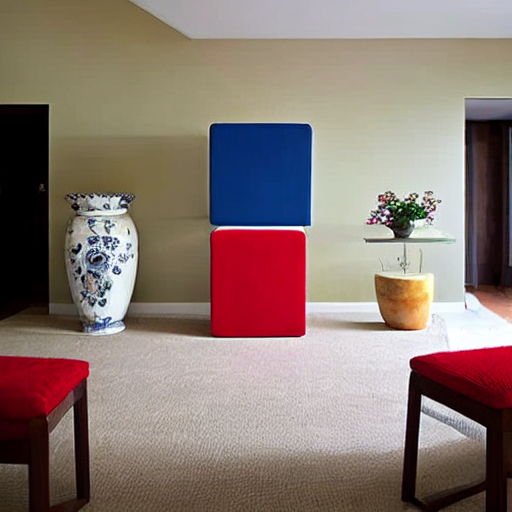

In [5]:
image_from_array(output[0]) # the first image

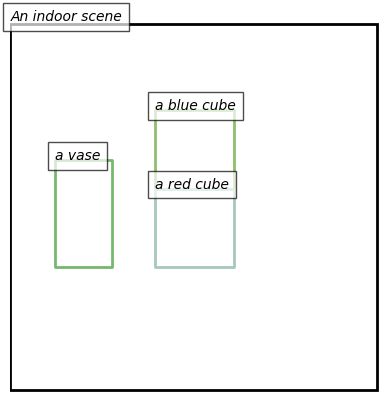

In [6]:
parsed_layout = parse_layout(prompt, layout)
fig, ax = draw_layout(**parsed_layout); fig

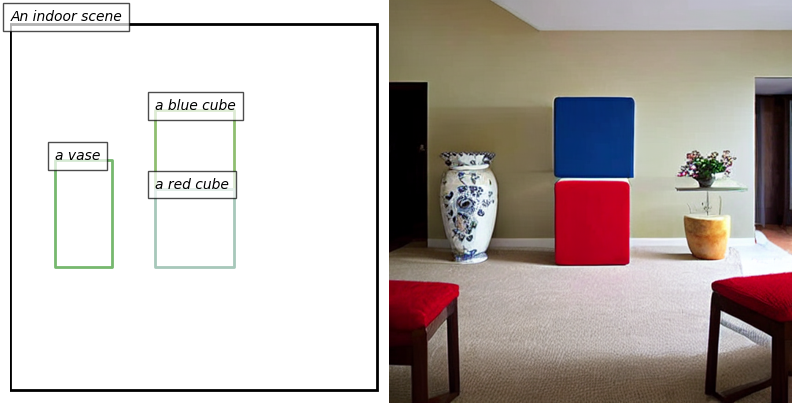

In [9]:
stitch_images(fig, output[0]) # side by side